In [1]:
pip install unsloth transformers trl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.7/192.7 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import torch
from unsloth import FastLanguageModel
from datasets import load_dataset
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth.chat_templates import get_chat_template, standardize_sharegpt

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch Gemma3ForConditionalGeneration.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [2]:
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/Llama-3.2-3B-Instruct",
    max_seq_length=2048,
    load_in_4bit=True,
)

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.35G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

In [3]:
model = FastLanguageModel.get_peft_model(
    model, r=16,
    target_modules = ['q_proj','k_proj','v_proj','o_proj', 'gate_proj', 'up_proj', 'down_proj']
)

Unsloth 2025.3.19 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


In [4]:
tokenizer = get_chat_template(tokenizer, chat_template="llama-3.1")

In [5]:
import pandas as pd
from datasets import Dataset
custom_file = pd.read_csv("/content/drive/MyDrive/sem6-project/datasets/CombinedDataset.csv")
custom_file.head(n=-1 )

,productName,description,question,answer
0,"Men Printed, Typography Round Neck Pure Cotton...",No description found!,My height 5.4 size suggestion...?,Xl chest 42 langth 29
1,"Men Printed, Typography Round Neck Pure Cotton...",No description found!,How's is product please tell me?,It's good 100% cotton febric
2,"Men Printed, Typography Round Neck Pure Cotton...",No description found!,What is gsm of this t shirt,180 gsm cotton febric
3,"Men Printed, Typography Round Neck Pure Cotton...",No description found!,I am 5.7 and thin ... So can you recommend me ...,Xl or xxl
4,"Men Printed, Typography Round Neck Pure Cotton...",No description found!,What is the solder size of L size,17.5
...,...,...,...,...
19089,Thomson 139 cm (55 inch) QLED Ultra HD (4K) Sm...,Bring the theatre experience home with Thomson...,Which tv is better TCL c645 or Thomson phoenix...,Thomson phoenix
19090,Thomson 139 cm (55 inch) QLED Ultra HD (4K) Sm...,Bring the theatre experience home with Thomson...,Does this TV has upscale like converting lower...,Yes
19091,Thomson 139 cm (55 inch) QLED Ultra HD (4K) Sm...,Bring the theatre experience home with Thomson...,Can we connect CPU?,Only with HDMI port. No VGA port is available
19092,Thomson 139 cm (55 inch) QLED Ultra HD (4K) Sm...,Bring the theatre experience home with Thomson...,How to connect screen mirroring,Download google home in your smartphone and co...


In [6]:
review_summary_file = pd.read_csv("/content/drive/MyDrive/sem6-project/datasets/review_summary_dict.csv", index_col=0)
review_summary_file.head()

,0
"SBL Silk' n Stay Aloevera Cream 100g each [Pack of 2 ] [100gX2 , 200 g] (200 g)","{'summary_text': ""Oily., Nyce, very good, Very..."
LORD'S CREAM FOR COMPLEXION PACK OF 2 (EACH OF 25 GM ) (50 g),"{'summary_text': 'Good, Thanks, Ok, Good produ..."
"Deyga Aloe Vera Gel 100% Pure Multipurpose for Face, Skin & Hair (100 g)","{'summary_text': 'Good product, Very effective..."
Shahnaz Husain SHAMOIST 50GM (50 ml),{'summary_text': 'Good but darker in face afte...
"DR.RASHEL Vitamin C Skin Whitening Cream | For Hyperpigmentation, Brown Spot | Even Out Skin Tone (380 ml)","{'summary_text': ""It's very oily, Nice, Nice c..."


In [7]:
review_summary_dict = review_summary_file.to_dict()
review_summary_dict

{'0': {"SBL Silk' n Stay Aloevera Cream 100g each [Pack of 2 ] [100gX2 , 200 g]\xa0\xa0(200 g)": '{\'summary_text\': "Oily., Nyce, very good, Very good, Osum cream bt not for whiting, Baje cream don\'t waist Manny, Amazing, Nice, Good product, It\'s a nice, Nice products."}',
  "LORD'S CREAM FOR COMPLEXION PACK OF 2 (EACH OF 25 GM )\xa0\xa0(50 g)": "{'summary_text': 'Good, Thanks, Ok, Good product, Good, Nice, Worst product, Super product must buy this..., Very nice, good product, Low quality product...., Very good ptoduct.'}",
  'Deyga Aloe Vera Gel 100% Pure Multipurpose for Face, Skin & Hair\xa0\xa0(100 g)': "{'summary_text': 'Good product, Very effective, Using it .. I like it, Nice, Good, The best aloevera gel i ever used., Nice, Alovera is pure But price is very high Please deyga make it affordable.'}",
  'Shahnaz Husain SHAMOIST 50GM\xa0\xa0(50 ml)': "{'summary_text': 'Good but darker in face after 1 week use, good, good product. Using for last 25years, Good mast, Very bad produ

In [8]:
def format_data(example):
  name = example['productName']
  if name in review_summary_dict:
    review_summary = review_summary_dict[name]
  else:
    review_summary = "Not  enough reviews!"

  return [{"role": "system", "content": "You are a product related question answering assistant, based on product's description and review summary."},
          {"role": "user", "content": f"Product: {example['productName']}\nDescription: {example['description']}\nReview summary: {review_summary}\nQuestion: {example['question']}"},
          {"role": "assistant", "content": example['answer']}] # Format as list of dicts with role and content

custom_file["text"] = custom_file.apply(format_data, axis=1)
custom_file = custom_file[["text"]]
print(custom_file.head())
custom_dataset = Dataset.from_pandas(custom_file)
# custom_dataset = Dataset.from_pandas(custom_file)

                                                text
0  [{'role': 'system', 'content': 'You are a prod...
1  [{'role': 'system', 'content': 'You are a prod...
2  [{'role': 'system', 'content': 'You are a prod...
3  [{'role': 'system', 'content': 'You are a prod...
4  [{'role': 'system', 'content': 'You are a prod...


In [9]:
custom_dataset = standardize_sharegpt(custom_dataset)
custom_dataset["text"]

[[{'content': "You are a product related question answering assistant, based on product's description and review summary.",
   'role': 'system'},
  {'content': 'Product: Men Printed, Typography Round Neck Pure Cotton White T-Shirt\nDescription: No description found!\nReview summary: Not  enough reviews!\nQuestion: My height 5.4 size suggestion...?',
   'role': 'user'},
  {'content': 'Xl chest 42 langth 29', 'role': 'assistant'}],
 [{'content': "You are a product related question answering assistant, based on product's description and review summary.",
   'role': 'system'},
  {'content': "Product: Men Printed, Typography Round Neck Pure Cotton White T-Shirt\nDescription: No description found!\nReview summary: Not  enough reviews!\nQuestion: How's is product please tell me?",
   'role': 'user'},
  {'content': "It's good 100% cotton febric", 'role': 'assistant'}],
 [{'content': "You are a product related question answering assistant, based on product's description and review summary.",
  

In [10]:
custom_dataset = custom_dataset.map(
    lambda example: {
        "newtext": [
            tokenizer.apply_chat_template(convo, tokenize=False)
            for convo in example["text"]
        ]
    },
    batched=True,
)
custom_dataset

Map:   0%|          | 0/19095 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'newtext'],
    num_rows: 19095
})

In [11]:
custom_dataset["newtext"]

["<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 26 July 2024\n\nYou are a product related question answering assistant, based on product's description and review summary.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nProduct: Men Printed, Typography Round Neck Pure Cotton White T-Shirt\nDescription: No description found!\nReview summary: Not  enough reviews!\nQuestion: My height 5.4 size suggestion...?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nXl chest 42 langth 29<|eot_id|>",
 "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 26 July 2024\n\nYou are a product related question answering assistant, based on product's description and review summary.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nProduct: Men Printed, Typography Round Neck Pure Cotton White T-Shirt\nDescription: No description found!\nReview summary: Not  enough 

In [12]:
trainer = SFTTrainer(
    model=model,
    train_dataset=custom_dataset,
    dataset_text_field="newtext",
    max_seq_length=2048,
    args=TrainingArguments(
        per_device_train_batch_size=2,
        gradient_accumulation_steps=8,
        warmup_steps=100,
        num_train_epochs=1,
        learning_rate=5e-5,
        fp16=not torch.cuda.is_bf16_supported(),
        bf16=torch.cuda.is_bf16_supported(),
        logging_dir="./logs",
        logging_steps=10,
        output_dir="outputs",
        )
)

tokenizer_config.json:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

Unsloth: Tokenizing ["newtext"] (num_proc=2):   0%|          | 0/19095 [00:00<?, ? examples/s]

In [ ]:
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 19,095 | Num Epochs = 1 | Total steps = 1,193
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 8
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 8 x 1) = 16
 "-____-"     Trainable parameters = 24,313,856/3,000,000,000 (0.81% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rajk-ug22-cs (rajk-ug22-cs-nit-patna) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
10,4.137000
20,3.991000
30,3.840000
40,3.587700
50,3.326800
60,3.020100
70,2.586600
80,2.319300
90,2.142800
100,2.024600


In [ ]:
model.save_pretrained("fine_tuned_model")

In [ ]:
pip install tensorboard tensorboardX

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.2 MB/s eta 0:00:00


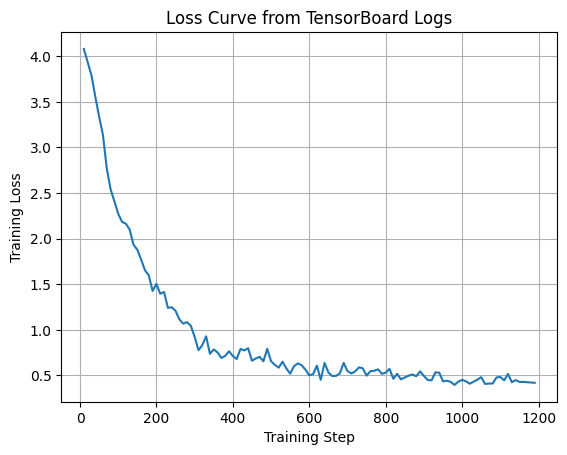

In [ ]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt

ea = event_accumulator.EventAccumulator('./logs')  # or point to the actual run dir inside ./logs
ea.Reload()
# print("Available tags:", ea.Tags()["scalars"])

scalars = ea.Scalars('train/loss')

steps = [s.step for s in scalars]
losses = [s.value for s in scalars]

plt.plot(steps, losses)
plt.xlabel("Training Step")
plt.ylabel("Training Loss")
plt.title("Loss Curve from TensorBoard Logs")
plt.grid(True)
plt.show()

In [ ]:
inference_model, inference_tokenizer = FastLanguageModel.from_pretrained(
    model_name="/content/drive/MyDrive/sem6-project/fine_tuned_model",
    max_seq_length=2048,
    load_in_4bit=True,
)

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.48.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [ ]:


for prompt in text_prompt:
  formatted_prompt = inference_tokenizer.apply_chat_template([{
      "role": "user",
      "content": prompt,
  }], tokenize=False)

  model_inputs=inference_tokenizer(formatted_prompt, return_tensors="pt").to("cuda")
  generated_ids = inference_model.generate(
      **model_inputs,
      max_new_tokens=512,
      temperature=0.7,
      do_sample=True,
      pad_token_id = inference_tokenizer.eos_token_id,
  )
  response = inference_tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
  # print(response)

In [ ]:
# response
print(response)

system

Cutting Knowledge Date: December 2023
Today Date: 09 Apr 2025

user

noise buds mvp102 with dual pairing 60 hours playtimeultra low latencyencquad mic bluetoothÂ Â valant white true wireless? kya ye waterproof hai?assistant

MVP102 kya waterproof hai?
